In [1]:
import pandas as pd
import ast

df = pd.read_csv("depth_ablations.csv")

# Parse the decoder_settings column and flatten it
decoder_settings_df = df['decoder_settings'].apply(ast.literal_eval).apply(pd.Series)

# Add the flattened columns to the original dataframe
df = pd.concat([df, decoder_settings_df], axis=1)

# Drop the original decoder_settings column
df = df.drop('decoder_settings', axis=1)
df

,n_samples,dataset,vsa,hv_dim,depth,device,time_per_sample,accuracy,final_flag,cos_sim_mean,cos_sim_std,beam_size,initial_limit,limit,pruning_method,use_g3_instead_of_h3,use_one_initial_population,use_size_aware_pruning
0,100,zinc,HRR,5120,3,cuda,4.927054,0.31,77.0,0.990567,0.012855,32,1024,512,cos_sim,False,False,True
1,100,zinc,HRR,5120,4,cuda,5.056195,0.31,72.0,0.989801,0.025870,32,1024,512,cos_sim,False,False,True
2,100,zinc,HRR,5120,5,cuda,5.043810,0.36,67.0,0.981398,0.082586,32,1024,512,cos_sim,False,False,True
3,100,zinc,HRR,5120,6,cuda,5.220621,0.31,67.0,0.982402,0.094347,32,1024,512,cos_sim,False,False,True
4,100,zinc,HRR,5632,3,cuda,5.088835,0.32,84.0,0.989596,0.013812,32,1024,512,cos_sim,False,False,True
5,100,zinc,HRR,5632,4,cuda,5.183491,0.30,72.0,0.986047,0.035188,32,1024,512,cos_sim,False,False,True
6,100,zinc,HRR,5632,5,cuda,5.152270,0.33,65.0,0.990551,0.022756,32,1024,512,cos_sim,False,False,True
7,100,zinc,HRR,5632,6,cuda,5.202828,0.32,64.0,0.989855,0.031636,32,1024,512,cos_sim,False,False,True
8,100,zinc,HRR,6144,3,cuda,4.949560,0.32,77.0,0.990501,0.014496,32,1024,512,cos_sim,False,False,True
9,100,zinc,HRR,6144,4,cuda,4.982125,0.29,71.0,0.989715,0.021636,32,1024,512,cos_sim,False,False,True


## Effect of Depth on Accuracy, Final Flags, and Cosine Similarity (Grouped by hv_dim)

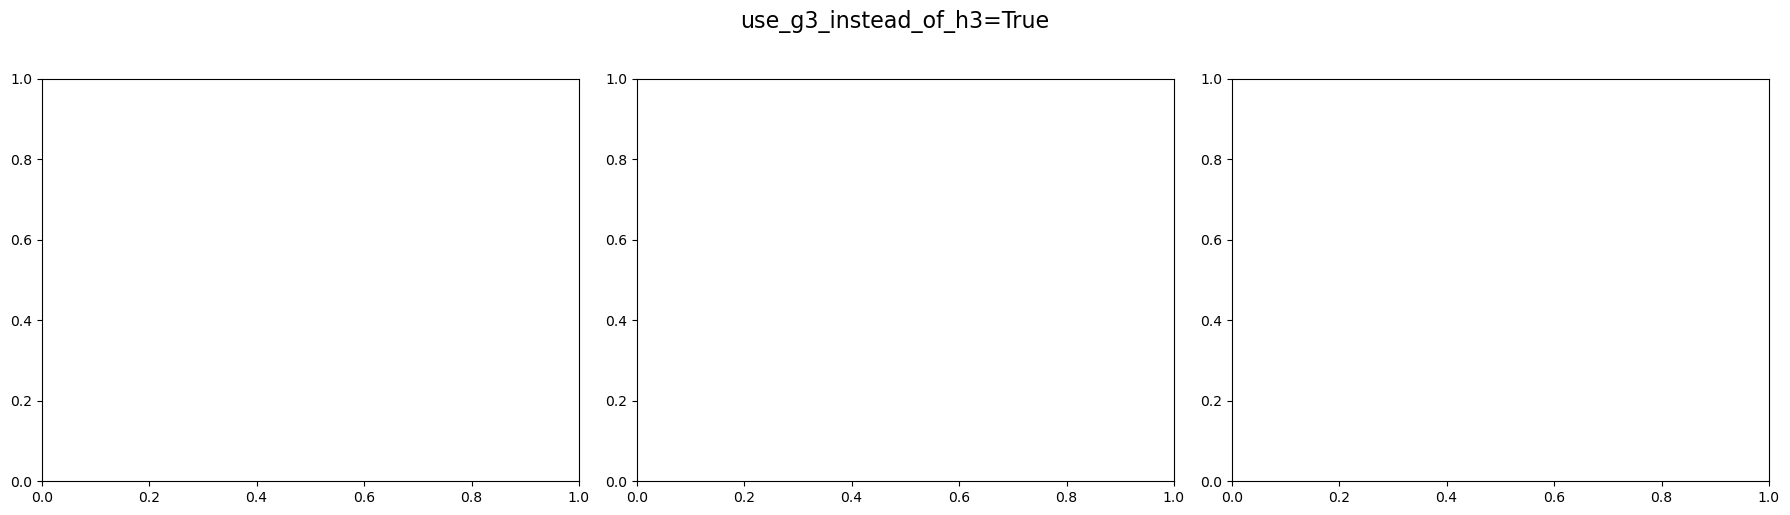

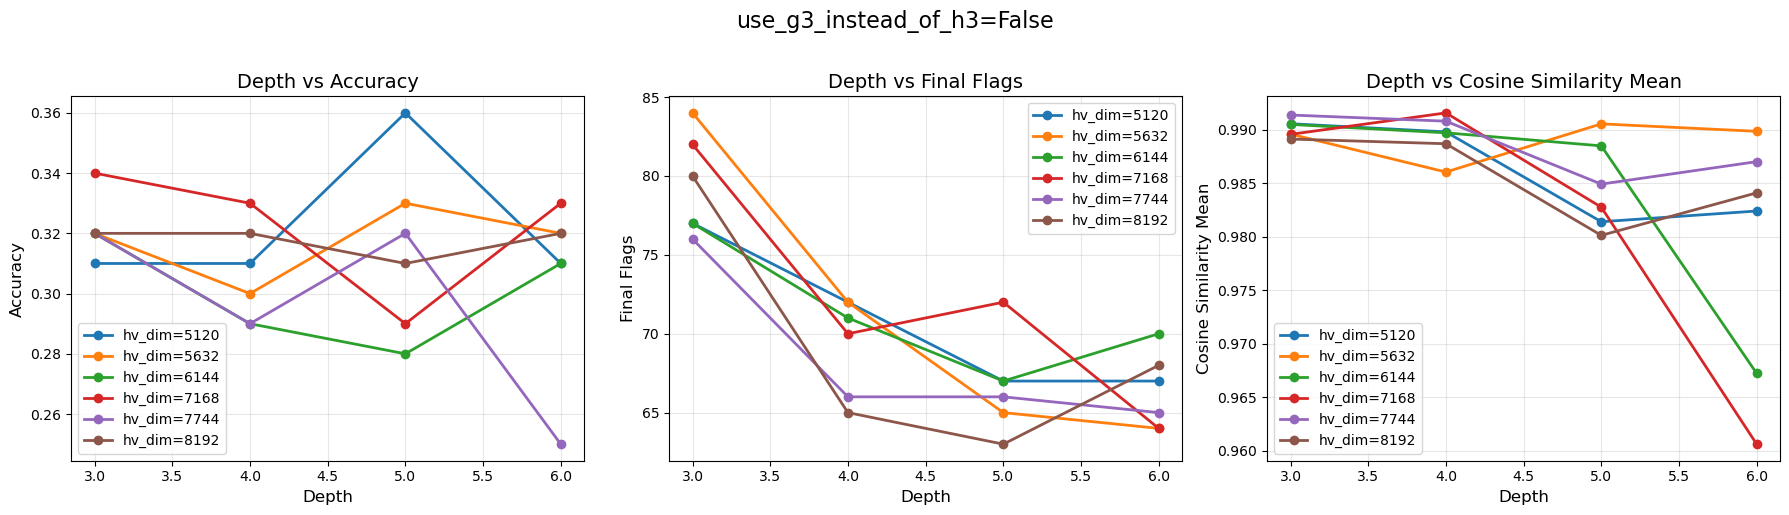

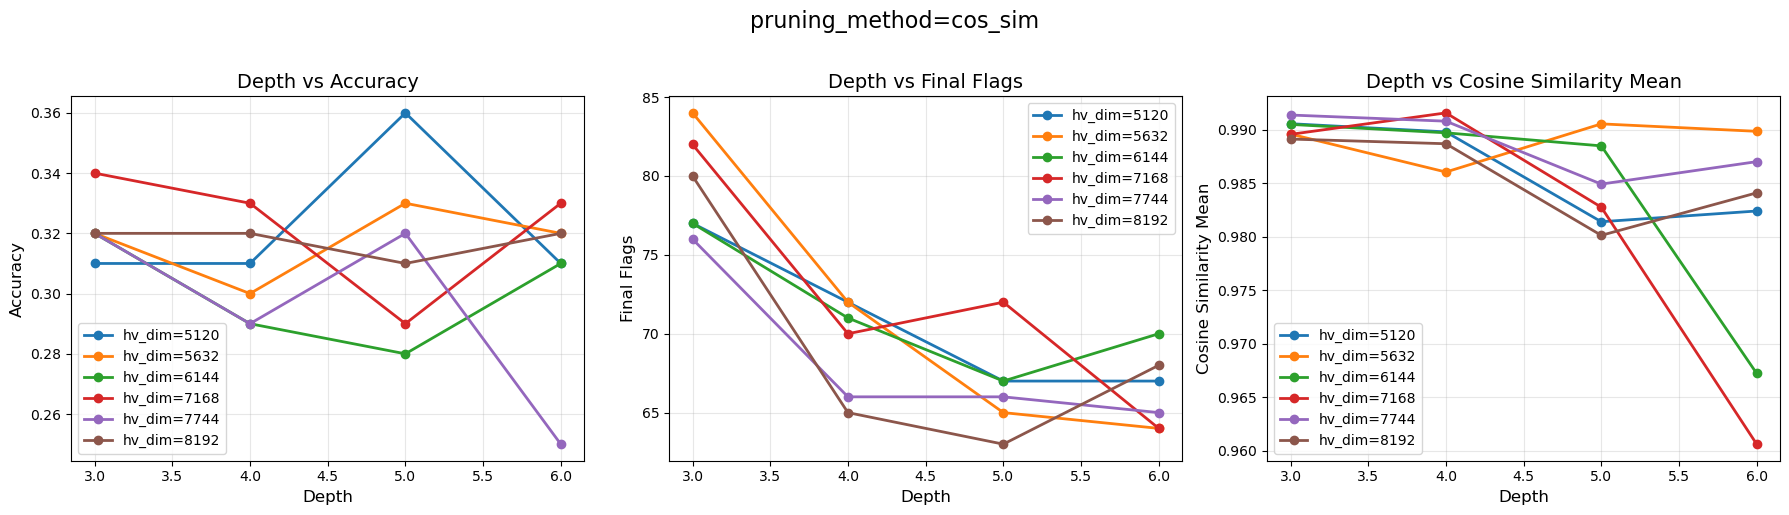

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create plots for use_g3_instead_of_h3 comparison
for use_g3 in [True, False]:
    df_g3 = df[df['use_g3_instead_of_h3'] == use_g3]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'use_g3_instead_of_h3={use_g3}', fontsize=16, y=1.02)

    metrics = ['accuracy', 'final_flag', 'cos_sim_mean']
    titles = ['Depth vs Accuracy', 'Depth vs Final Flags', 'Depth vs Cosine Similarity Mean']
    ylabels = ['Accuracy', 'Final Flags', 'Cosine Similarity Mean']

    for hv_dim in df_g3['hv_dim'].unique():
        df_hv = df_g3[df_g3['hv_dim'] == hv_dim]

        for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
            ax = axes[idx]

            grouped = df_hv.groupby('depth')[metric].max()
            ax.plot(grouped.index, grouped.values, marker='o', label=f'hv_dim={hv_dim}', linewidth=2)

            ax.set_xlabel('Depth', fontsize=12)
            ax.set_ylabel(ylabel, fontsize=12)
            ax.set_title(title, fontsize=14)
            ax.legend()
            ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Create plots for pruning_method comparison
for pruning_method in df['pruning_method'].unique():
    df_pruning = df[df['pruning_method'] == pruning_method]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'pruning_method={pruning_method}', fontsize=16, y=1.02)

    metrics = ['accuracy', 'final_flag', 'cos_sim_mean']
    titles = ['Depth vs Accuracy', 'Depth vs Final Flags', 'Depth vs Cosine Similarity Mean']
    ylabels = ['Accuracy', 'Final Flags', 'Cosine Similarity Mean']

    for hv_dim in df_pruning['hv_dim'].unique():
        df_hv = df_pruning[df_pruning['hv_dim'] == hv_dim]

        for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
            ax = axes[idx]

            grouped = df_hv.groupby('depth')[metric].max()
            ax.plot(grouped.index, grouped.values, marker='o', label=f'hv_dim={hv_dim}', linewidth=2)

            ax.set_xlabel('Depth', fontsize=12)
            ax.set_ylabel(ylabel, fontsize=12)
            ax.set_title(title, fontsize=14)
            ax.legend()
            ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


In [ ]:
for use_pruning in [True, False]:
    df_pruning = df[df['use_size_aware_pruning'] == use_pruning]

    for hv_dim in df_pruning['hv_dim'].unique():
        df_hv = df_pruning[df_pruning['hv_dim'] == hv_dim]

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f'Effect of Depth for hv_dim={hv_dim}, use_size_aware_pruning={use_pruning}', fontsize=16, y=1.02)

        for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
            ax = axes[idx]

            for beam_size in sorted(df_hv['beam_size'].unique()):
                df_beam = df_hv[df_hv['beam_size'] == beam_size]
                grouped = df_beam.groupby('depth')[metric].mean()
                ax.plot(grouped.index, grouped.values, marker='o', label=f'beam_size={beam_size}', linewidth=2)

            ax.set_xlabel('Depth', fontsize=12)
            ax.set_ylabel(ylabel, fontsize=12)
            ax.set_title(title, fontsize=14)
            ax.legend()
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
